pip install mediapipe opencv-python

In [2]:
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
# VIDEO FEED
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

###  make detections


In [5]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    

In [4]:
mp_drawing.DrawingSpec??

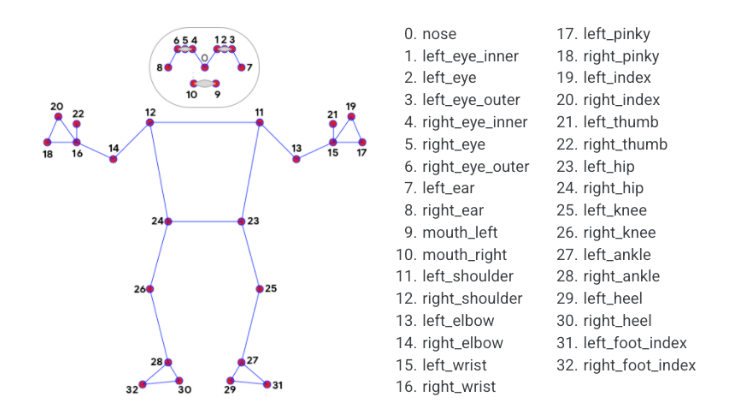

In [3]:
from IPython import display
display.Image(r"C:\Users\ayush\Desktop\img.png")

In [5]:
right_ankle = []
left_ankle = []
left_foot = []
right_foot = []


In [5]:
cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle.append(landmarks[27])
            right_ankle.append(landmarks[28])
            left_foot.append(landmarks[31])
            right_foot.append(landmarks[32])
            
        except:
            pass
  
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
left_ankle

In [ ]:
left_foot

In [ ]:
right_foot

In [ ]:
right_ankle

In [ ]:
from IPython import display
display.Image(r"C:\Users\ayush\Desktop\img.png")

In [ ]:
right

In [ ]:
landmarks[28]

When we're working with jumping jacks and high knees we need to work with angles 
as for the normal jumps we just need to see the change in y coordinate


comp vision approach


In [ ]:
def motion_detector():
  
  frame_count = 0
  previous_frame = None
  
  while True:
    frame_count += 1

    # 1. Load image; convert to RGB
    img_brg = np.array(ImageGrab.grab())
    img_rgb = cv2.cvtColor(src=img_brg, code=cv2.COLOR_BGR2RGB)

    if ((frame_count % 2) == 0):

     # 2. Prepare image; grayscale and blur
        prepared_frame = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        prepared_frame = cv2.GaussianBlur(src=prepared_frame, ksize=(5,5), sigmaX=0)

    # 3. Set previous frame and continue if there is None
    if (previous_frame is None):
      # First frame; there is no previous one yet
        previous_frame = prepared_frame
        continue

    # calculate difference and update previous frame
    diff_frame = cv2.absdiff(src1=previous_frame, src2=prepared_frame)
    previous_frame = prepared_frame

    # 4. Dilute the image a bit to make differences more seeable; more suitable for contour detection
    kernel = np.ones((5, 5))
    diff_frame = cv2.dilate(diff_frame, kernel, 1)

    # 5. Only take different areas that are different enough (>20 / 255)
    thresh_frame = cv2.threshold(src=diff_frame, thresh=20, maxval=255, type=cv2.THRESH_BINARY)[1]

### Working with the landmark points 

In [ ]:
right_ankle

In [ ]:
right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []


In [1]:
cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            
            
        except:
            pass
  
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)
        
        if not ret: 
            break
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [ ]:
plt.plot(right_ankle_y)

In [ ]:
plt.plot(left_ankle_y)

In [ ]:
plt.plot(left_ankle_x)

In [ ]:
plt.plot(right_ankle_x)

In [ ]:
fig = px.line(df, x="time", y="coordinates", title='Ankle y')
fig.show()

# Final Iteration 

In [2]:
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [3]:
right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []


In [11]:
%matplotlib auto

Using matplotlib backend: <object object at 0x000001B3D73ACF20>


In [30]:
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []

cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            


        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               


        cv2.imshow('Mediapipe Feed', image)


        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
        
    cap.release()
    cv2.destroyAllWindows()

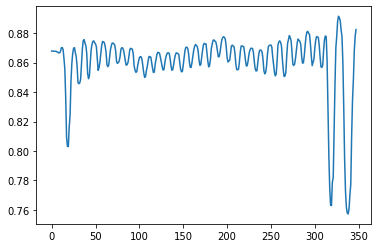

In [31]:
plt.plot(right_ankle_y)

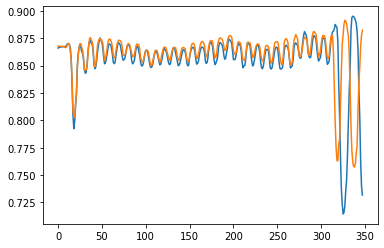

In [32]:
plt.plot(left_ankle_y)
plt.plot(right_ankle_y)

In [33]:
import plotly.express as px
import numpy as np
import pandas as pd

fig=px.line(right_ankle_y)
# Add range slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True),
                             type="linear"))


fig.show()

In [34]:
#difference between each jump
difference_rightankle_y = [n-(n-1) for n in right_ankle_y]


In [35]:
difference_rightankle_y = []
for i in range(len(right_ankle_y)):
    difference_rightankle_y.append(right_ankle_y[i]-right_ankle_y[i-1])

In [39]:
import plotly.express as px
import numpy as np
import pandas as pd

fig=px.line(right_ankle_y)
# Add range slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True),
                             type="linear"))


fig.show()

In [60]:
import plotly.express as px
import numpy as np
import pandas as pd

fig=px.line(difference_rightankle_y)
# Add range slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True),
                             type="linear"))


fig.show()

In [41]:
import pandas as pd

In [56]:
df = pd.DataFrame(data = difference_rightankle_y)

In [57]:
df.min()

0   -0.035093
dtype: float64

In [58]:
df.max()

0    0.032891
dtype: float64

In [59]:
df.median()

0   -0.000006
dtype: float64

## Adding counter 

In [ ]:
t